# Waterpoint Operational Status Prediction Project


Access to clean and safe drinking water is a fundamental right and crucial for health and well-being. In Tanzania, many communities rely on waterpoints for their water supply, making the operational status of these facilities vital. This dataset provides comprehensive information on various waterpoints, including their characteristics and operational conditions.


## Objective

The goal of this analysis is to predict the operational status of waterpoints based on the provided features. By doing so, we aim to enhance access to clean and potable water throughout Tanzania, which is essential for public health and improving living conditions for countless individuals.


## Business Understanding

Access to clean and reliable water sources is crucial for the health and well-being of communities. In Tanzania, waterpoints play an essential role in providing potable water, but many of these waterpoints face operational challenges. Some are fully functional, others operate but require repairs, and a significant number are non-functional, limiting access to safe drinking water. This project seeks to address this issue by developing a predictive model that can determine the operational status of waterpoints.

By accurately identifying which water pumps are likely to fail or need repairs, we can proactively manage resources, improve maintenance planning, and ultimately enhance access to clean water across Tanzania. This initiative will contribute to sustainable water management practices and support the long-term goal of achieving water security for all.


## Data Understanding

The dataset contains detailed information on waterpoints across Tanzania, capturing a variety of features that may influence the operational status of each waterpoint. These features range from geographic details to waterpoint characteristics, such as funding source, installation details, water quality, and management practices.

### Key Features in the Dataset:

- **amount_tsh**: The total static head (amount of water available).
- **date_recorded**: The date on which the data entry was recorded.
- **funder**: The entity or organization that funded the well construction.
- **gps_height**: Altitude of the waterpoint in meters.
- **longitude** and **latitude**: GPS coordinates of the waterpoint.
- **population**: Estimated population around the well.
- **public_meeting**: Boolean indicating if a public meeting was held for the waterpoint.
- **construction_year**: Year when the waterpoint was constructed.
- **extraction_type**: The method used for water extraction (e.g., handpump, motorized).
- **management** and **management_group**: Details on how the waterpoint is managed.
- **payment** and **payment_type**: Information on the cost of water usage.
- **water_quality** and **quality_group**: Indicators of water quality.
- **quantity** and **quantity_group**: Information on the water quantity available.
- **source** and **source_type**: Source of the water (e.g., river, spring).
- **waterpoint_type** and **waterpoint_type_group**: Type of waterpoint (e.g., communal standpipe, hand pump).

### Target Variable

The target variable in this dataset is the **operating condition** of each waterpoint, which is categorized as follows:
- **functional**: The waterpoint is operational with no issues.
- **functional needs repair**: The waterpoint is operational but requires repairs.
- **non-functional**: The waterpoint is not operational.

By understanding these features, we aim to identify the patterns and indicators that most accurately predict waterpoint functionality, enabling better planning and maintenance to ensure continuous access to clean water.



In [227]:
# Import libraries
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from xgboost import XGBClassifier  # XGBoost classifier for training the model
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation metrics
from sklearn.metrics import accuracy_score  # For calculating accuracy score
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.cluster import KMeans  # For clustering (e.g., creating location clusters)

In [228]:
# Load the main dataset
data = pd.read_csv('/content/pumps_train_x.csv')

# Load the target labels
label_data = pd.read_csv('/content/pumps_train_y.csv')

In [229]:
# Display first five rows of the dataset
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [230]:
# View shape of dataset
data.shape

(59400, 40)

In [231]:
label_data.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [232]:
# Get basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [233]:
# Get basic information about labels dataset
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [234]:
# Display summary statistics for numerical columns in the dataset
data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## Data Preparation

In this stage, we focus on preparing the dataset to optimize model performance and ensure robust analysis. The steps below outline the transformations and cleaning processes applied to the data:

### 1. Handling Missing Values
- Many features in the dataset contain missing values, particularly in fields such as `funder`, `installer`, `scheme_management`, and `scheme_name`.
- For categorical fields, we replace missing values with 'Unknown' or an appropriate placeholder.
- For numeric fields, we either use median or mean imputation depending on the distribution of the data.

### 2. Encoding Categorical Variables
- Since many features are categorical (e.g., `management`, `payment_type`, `water_quality`), they need to be converted into numeric representations.
- We use one-hot encoding or label encoding based on the model requirements.

### 3. Feature Engineering
- To improve predictive power, we create new features from existing data. For example:
  - **Year of operation** by subtracting `construction_year` from the recording year.

  
### 4. Scaling and Normalization
- For models sensitive to feature scaling, such as SVM or K-means, we normalize numerical features like `gps_height` and `amount_tsh` to ensure consistent scale across features.

### 5. Splitting the Data
- We split the data into training and testing sets to evaluate the model's performance on unseen data. A typical split of 80/20 is used to ensure ample training data while retaining a sufficient test set for evaluation.

By executing these preparation steps, we aim to create a clean, structured, and enriched dataset that is ready for model training and accurate performance assessment.



In [235]:
# Check for missing values in each column of the dataset
data.isna().sum()

,0
id,0
amount_tsh,0
date_recorded,0
funder,3637
gps_height,0
installer,3655
longitude,0
latitude,0
wpt_name,2
num_private,0


In [236]:
# Check for null values in our targets
label_data.isna().sum()

,0
id,0
status_group,0


In [237]:
# add status group column to data frame
data['status_group'] = label_data['status_group']

In [238]:
# Replace NAN installer with unknown
data['installer'] = data['installer'].fillna('Unknown')

In [239]:
# Replace NAN funder with unknown
data['funder'] = data['funder'].fillna('Unknown')

In [240]:
# Replace NAN scheme_management with unknown
data['scheme_management'] = data['scheme_management'].fillna('Unknown')

In [241]:
# Replace NAN public_meeting with unknown
data['public_meeting'] = data['public_meeting'].fillna('Unknown')

In [242]:
# Replace NAN permits with unknown
data['permit'] = data['permit'].fillna('Unknown')

In [243]:
# Change the date_recorded column from object to datetime and extract the year
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data['year_recorded'] = data['date_recorded'].dt.year

In [244]:
# Calculate the age of each pump by subtracting construction year from the recorded year
data['age_of_pump'] = data['year_recorded'] - data['construction_year']

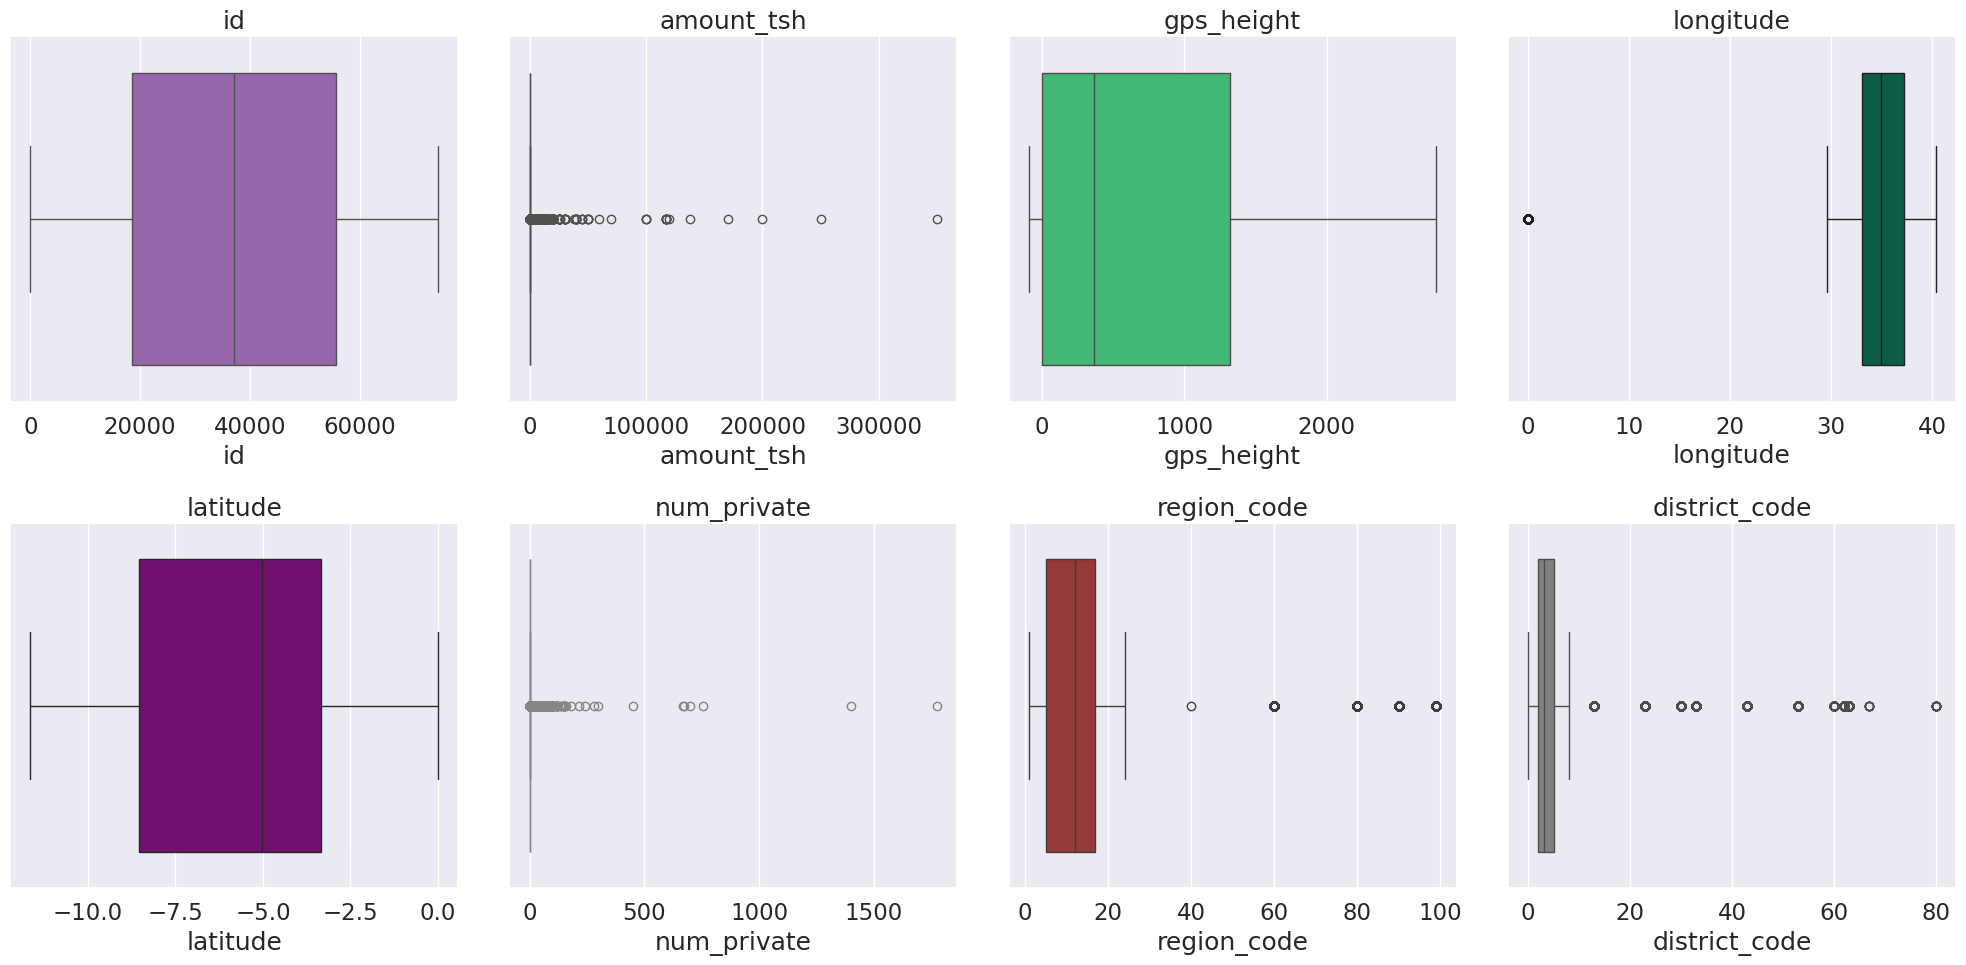

In [245]:
# Function to visualize outliers in numerical columns using boxplots
def visualize_outliers(data, numeric_cols):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()  # Convert 2D array of axes into a 1D array for easier iteration
    sns.set(font_scale=1.5)

    palette = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for idx, column in enumerate(numeric_cols[:8]):
        # Ensure the column is of numeric type
        data[column] = data[column].astype(float)

        sns.boxplot(x=data[column], ax=axes[idx], color=palette[idx])
        axes[idx].set_title(column)

    plt.tight_layout()
    plt.show()

# Extract numerical columns from the dataset
numeric_cols = data.select_dtypes(include='number').columns

# Call the function to generate boxplots
visualize_outliers(data, numeric_cols)


Our visualization shows outliers in the amount_tsh, num_private, region_code, district_code, and population columns. We won't analyze region_code and district_code further since they follow established standards. For num_private, we’ll examine its outliers during exploratory data analysis. Amount_tsh represents the Total Static Head, measuring the vertical distance a pump raises water, essentially indicating system pressure. High values like 350000 could be valid, so we’ll use a violin plot to explore its distribution. Since populations of 30000 are plausible, we won’t address outliers in that column. No outlier treatment will be applied.

## Exploratory Data Analysis

We will conduct the following analyses:  

Univariate Analysis: Examining each variable individually to understand its range and distribution.  
Bivariate Analysis: Analyzing pairs of variables to identify relationships between them.

#### Funder distribution

In [246]:
# tallying up unique responses in our dataset

def tally(column):

    groupings = column.value_counts()

    return groupings

print(tally(data.payment))
print('**************************************')
print('**************************************')
print(tally(data.payment_type))

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64
**************************************
**************************************
payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64


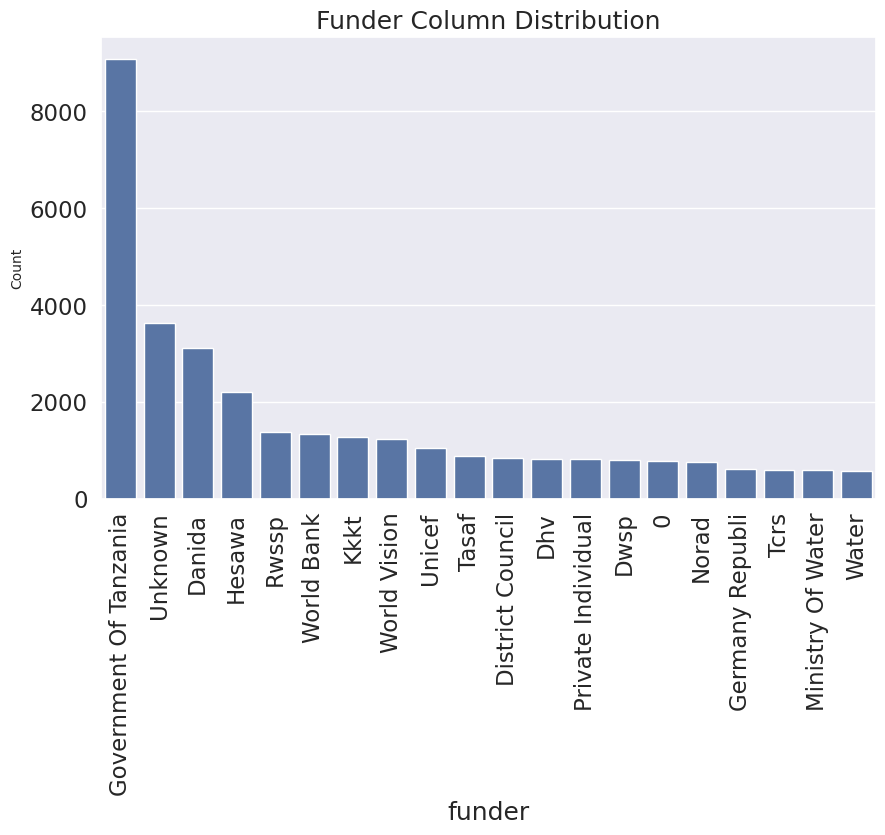

In [247]:
# function to plot distribution

def plot_data(data, col, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    column_groupings = tally(data[col])
    sns.barplot(x=column_groupings.head(20).index, y=column_groupings.head(20))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)


plot_data(data, 'funder', 'Funder Column Distribution')

Most wells in Tanzania are funded by the Government of Tanzania

#### Installer Distribution

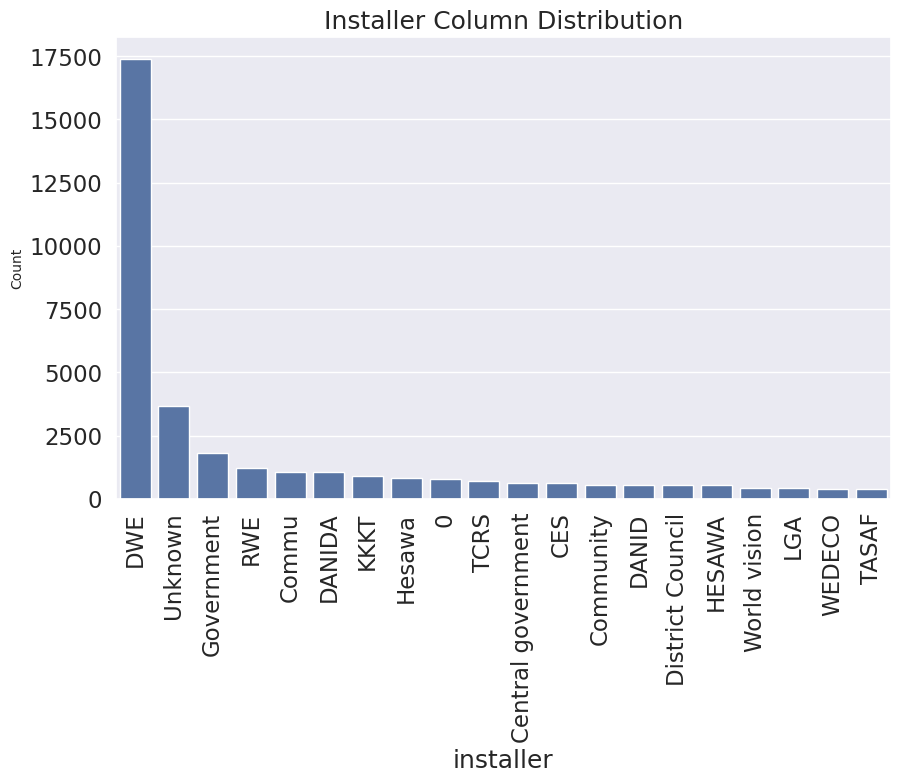

In [248]:
plot_data(data, 'installer', 'Installer Column Distribution')

Most water pumps have been installed by an organization called DWE

#### Waterpoint type distribution

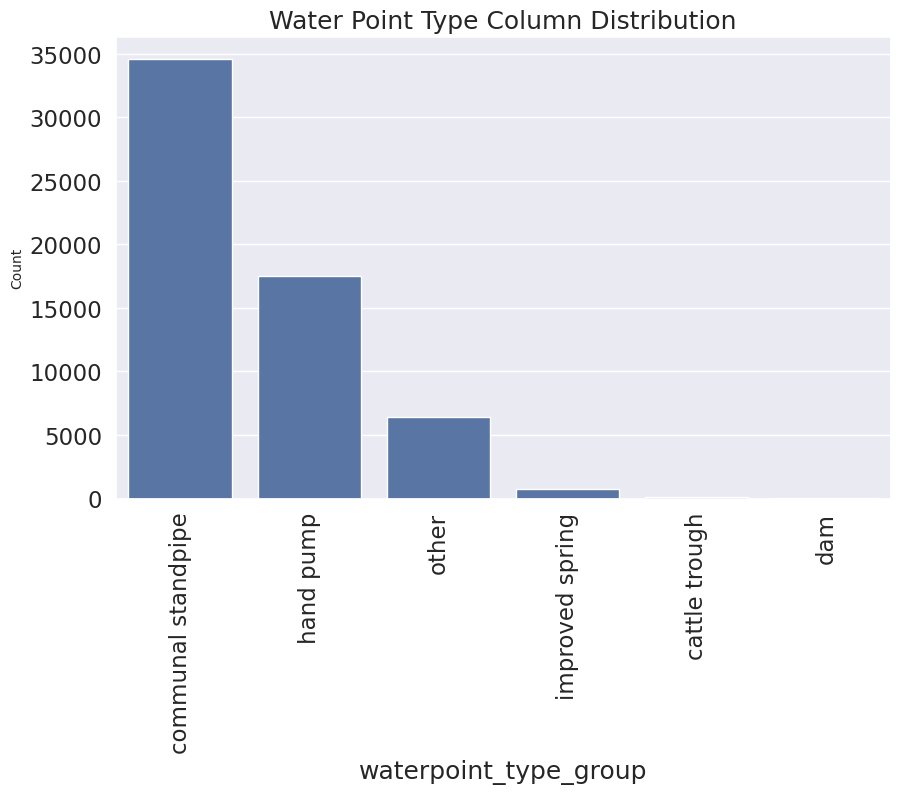

In [249]:
plot_data(data, 'waterpoint_type_group', 'Water Point Type Column Distribution')

#### Water Source Distribution

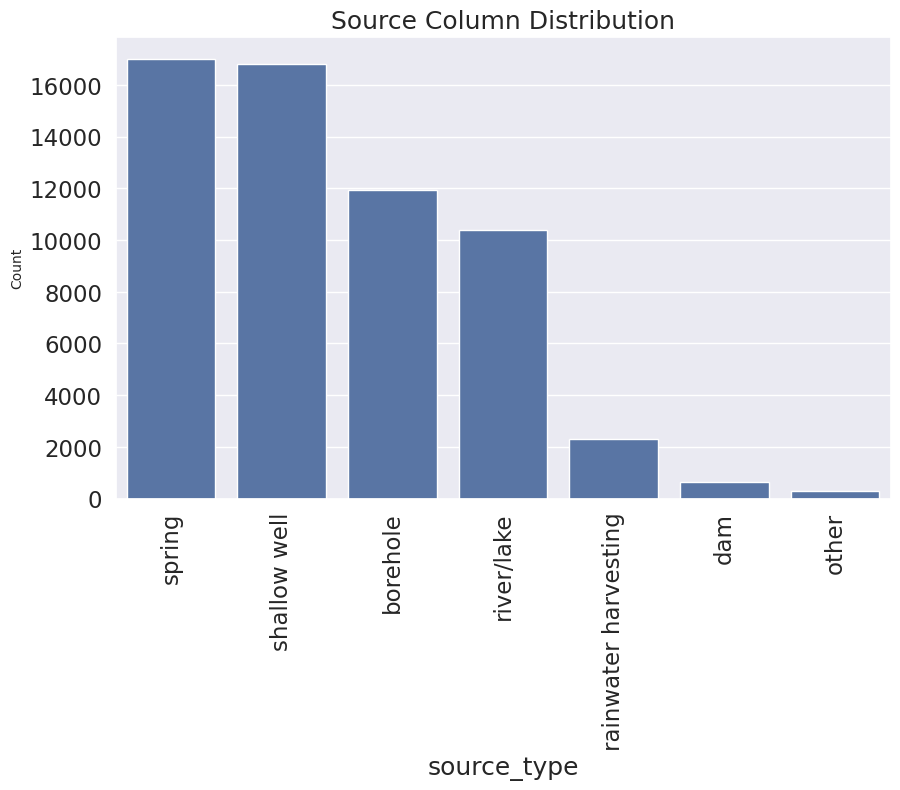

In [250]:
plot_data(data, 'source_type', 'Source Column Distribution')

Springs, shallow wells and boreholes are the main sources of water in the country

#### Management distribution

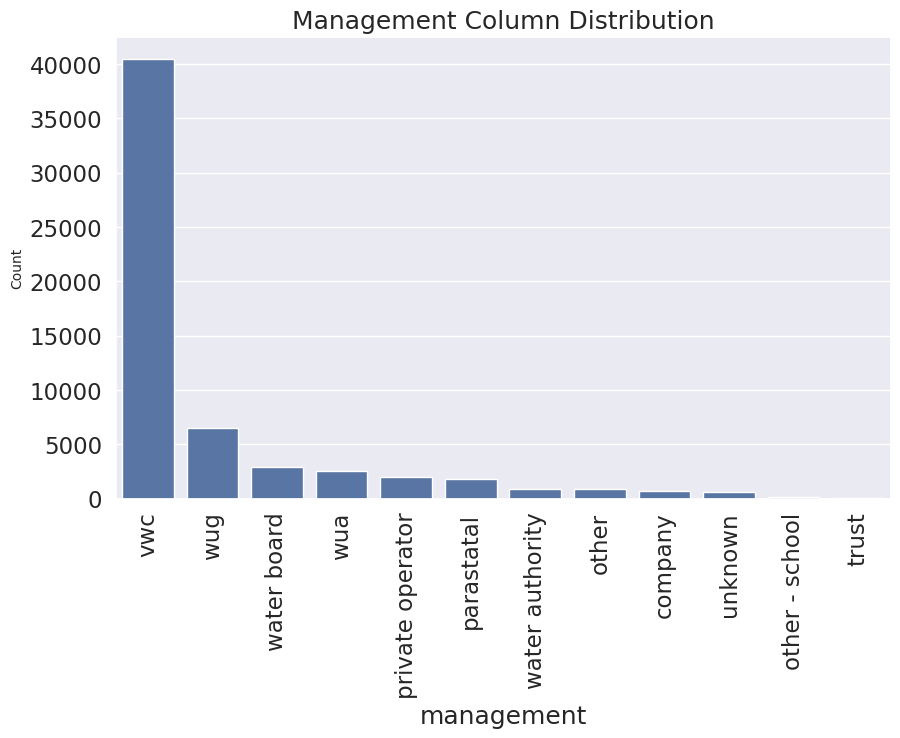

In [251]:
plot_data(data, 'management', 'Management Column Distribution')

The communities in Tanzania mostly use communal standpipe to pump their water

#### Extraction type distribution



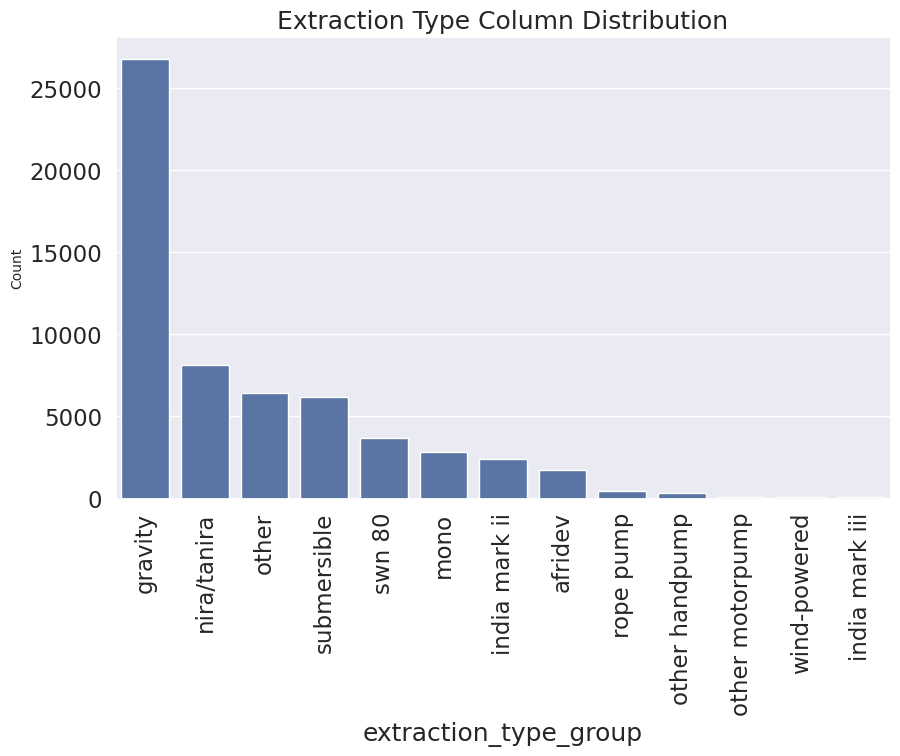

In [252]:
plot_data(data, 'extraction_type_group', 'Extraction Type Column Distribution')

The region mainly extracts its water using gravity

#### Payment Type Distribution

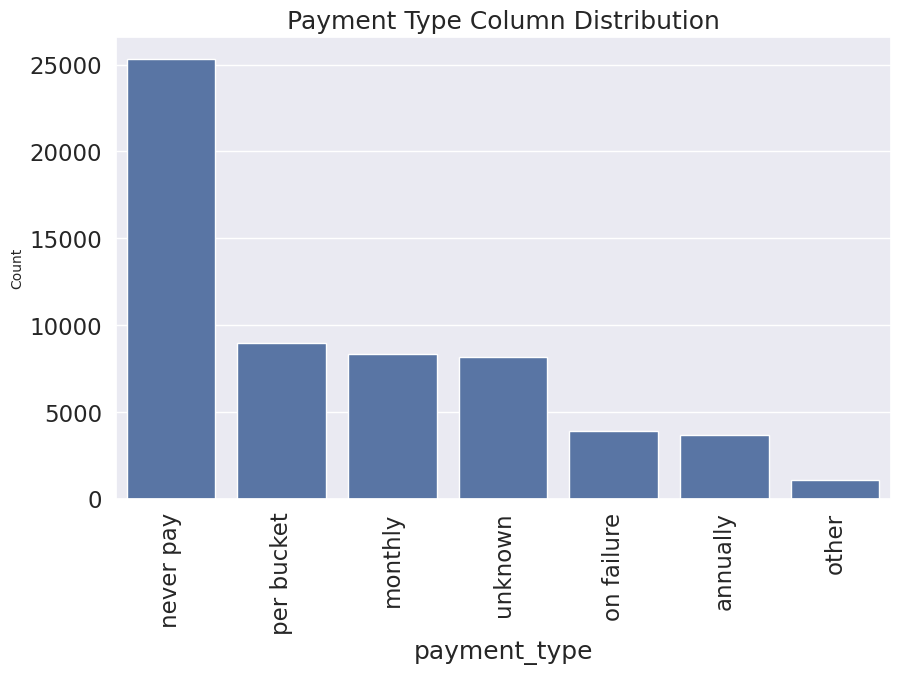

In [253]:
plot_data(data, 'payment_type', 'Payment Type Column Distribution')

Most people access water from wells without payment, likely because these wells are intended for community benefit rather than profit.

#### Water quality distribution

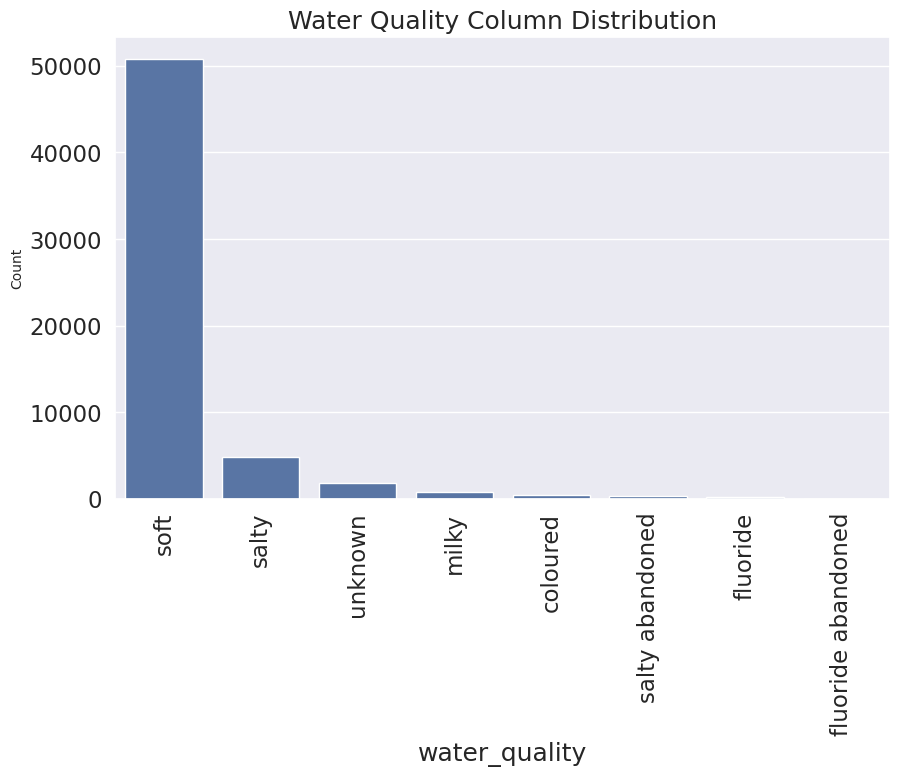

In [254]:
plot_data(data, 'water_quality', 'Water Quality Column Distribution')


Soft water lacks calcium and magnesium salts, which in excess can be harmful to both health and homes. Examples include rainwater and distilled water. Our visualization shows that communities in Tanzania primarily consume soft water.

#### Quantity distribution

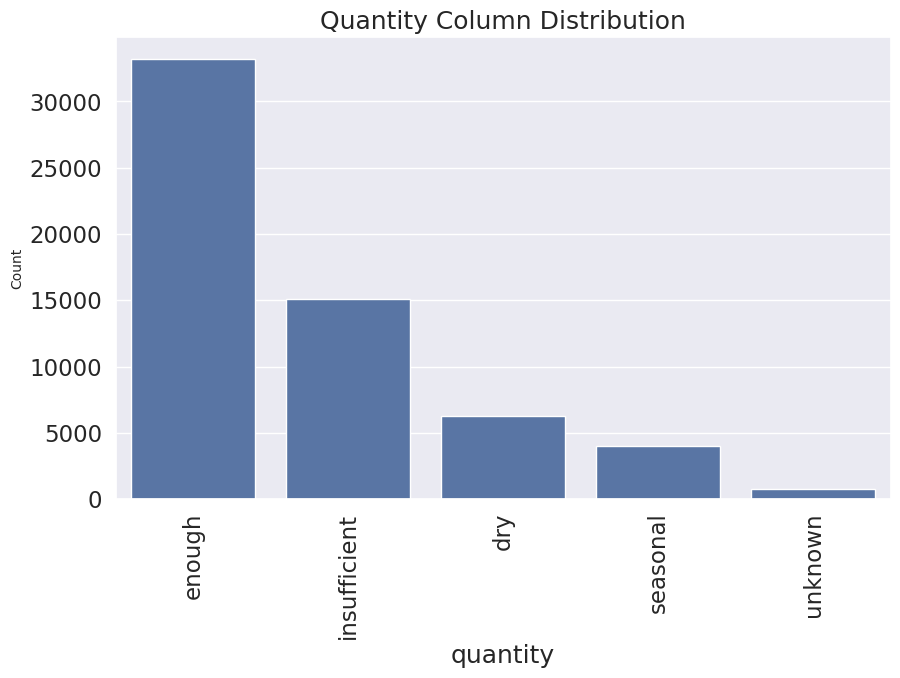

In [255]:
plot_data(data, 'quantity', 'Quantity Column Distribution')

It is evident that most communities in Tanzania have sufficient water to meet their needs.

#### Distribution of Status Group

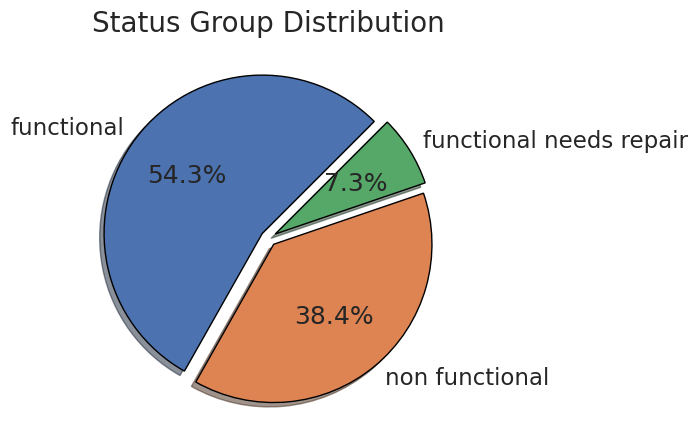

In [256]:
slices = data['status_group'].value_counts().values

labels = data['status_group'].value_counts().index

explode = [0.05, 0.05, 0.05]

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)

plt.title('Status Group Distribution', fontsize = 20)
plt.tight_layout()
plt.show()

Our pie chart indicates that around 55% of water pumps are fully functional, 7% are operational but require repairs, and 38% are non-functional.

#### Quantity Vs Functionality

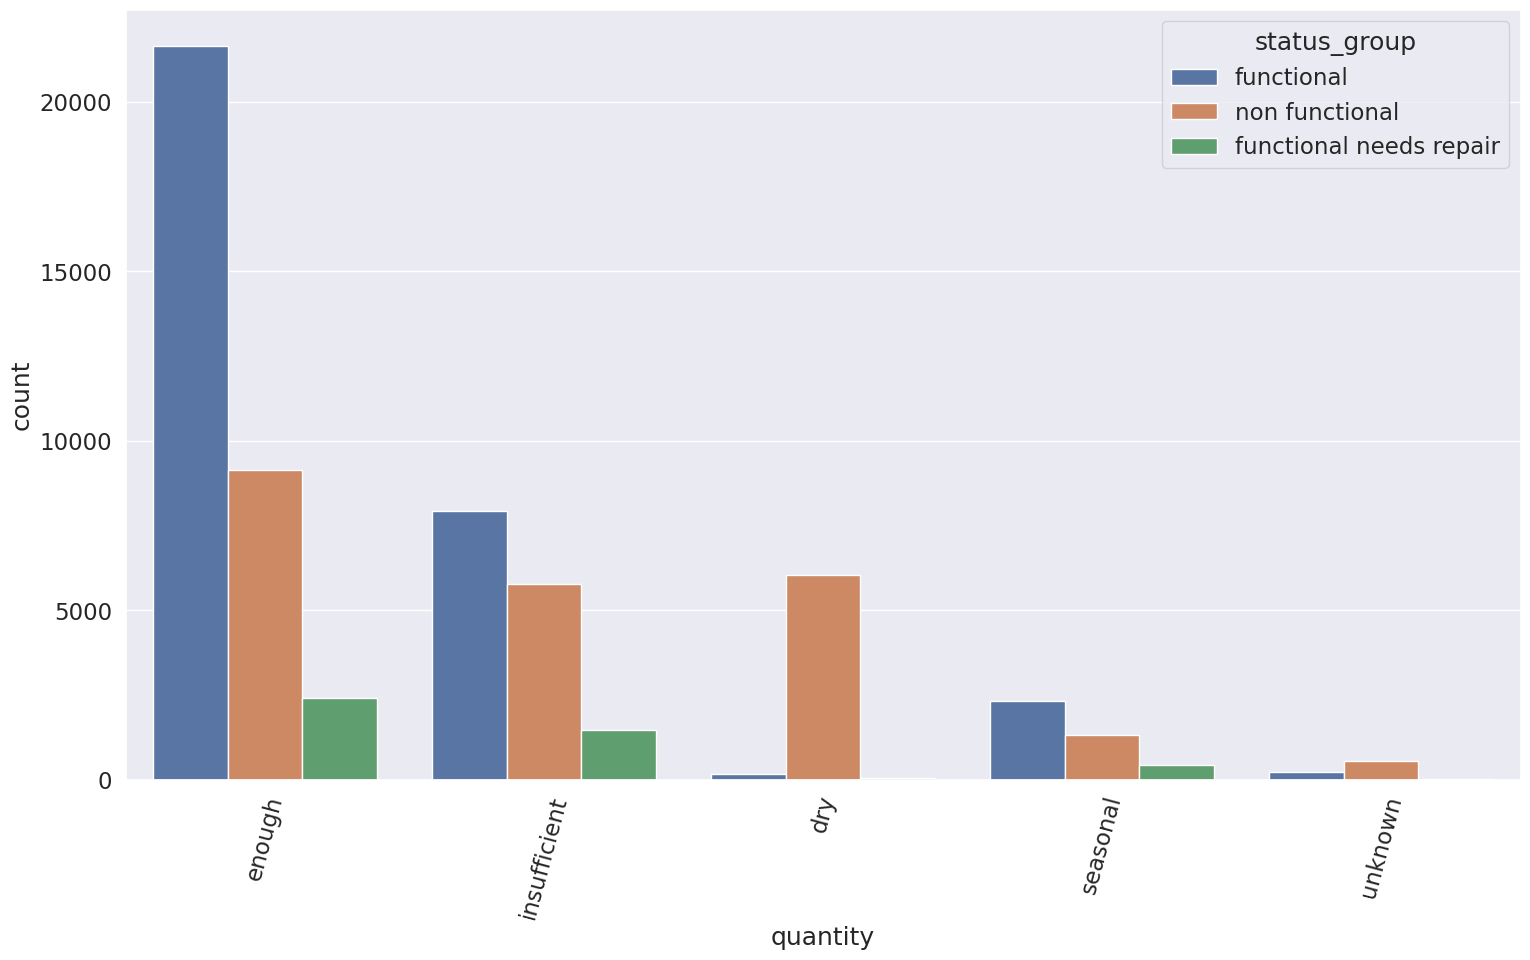

In [257]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='quantity', hue="status_group", data=data)
plt.xticks(rotation=75);


The more water there is the more functional the wells are

#### Payment Vs Fuctionality

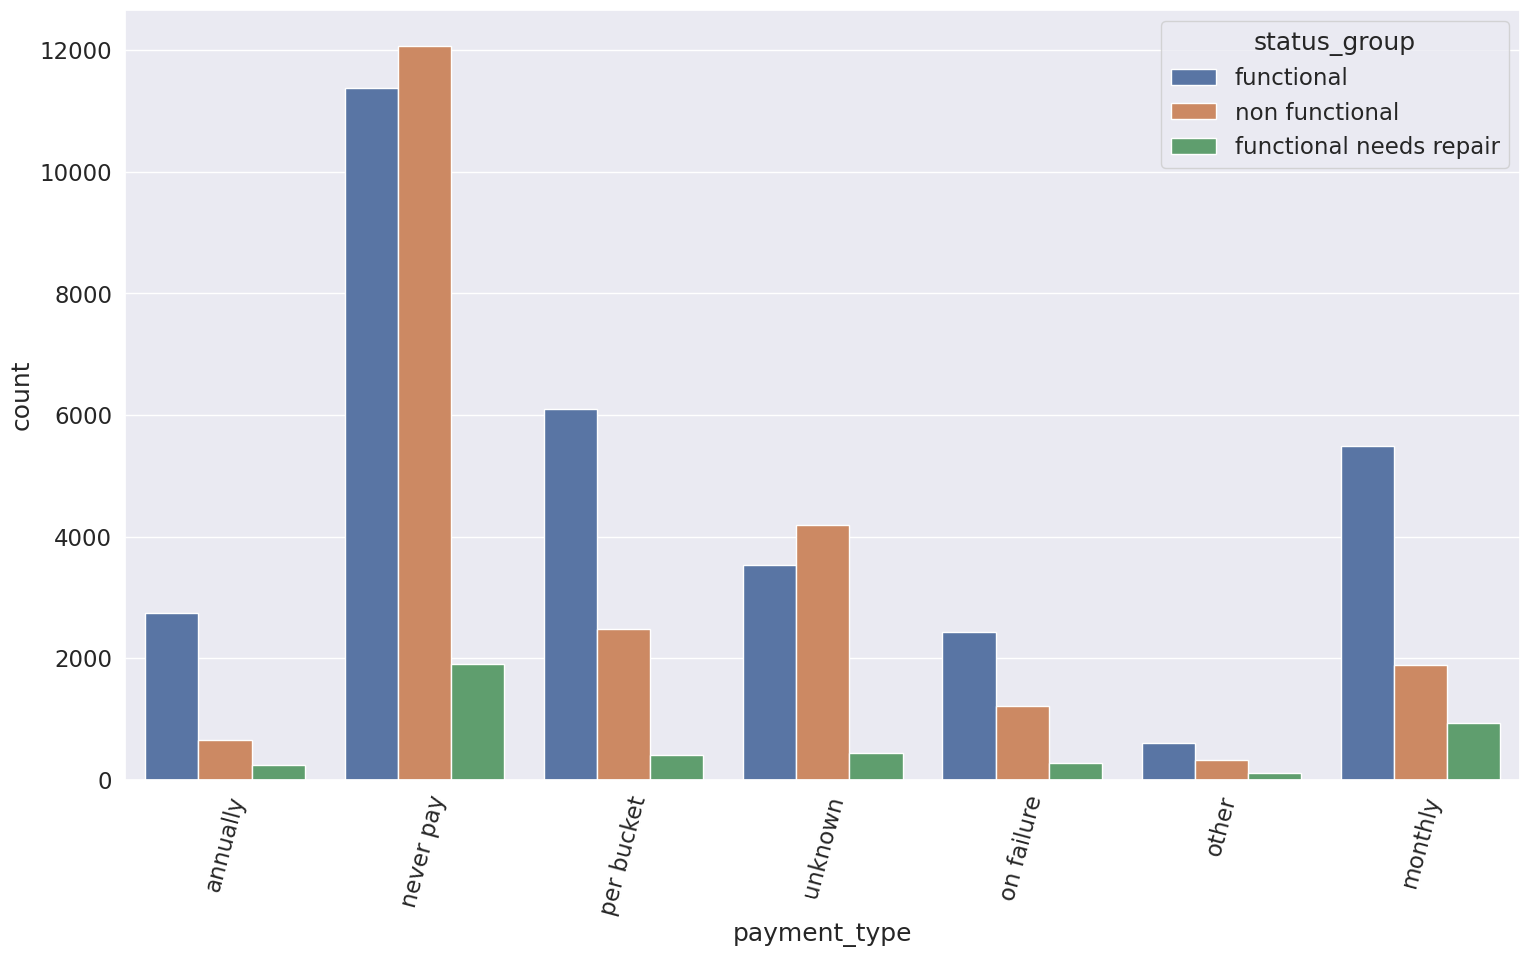

In [258]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=data)
plt.xticks(rotation=75);

Most of the functional and non functional water pumps are never paid for, again this might be because of the fact that they are communal

## Selected Features for the classifiers

To predict the operational condition of waterpoints, we focused on features that likely impact functionality, accessibility, and maintenance needs. Below are the chosen features along with explanations of why each is relevant to the classification:

1. **amount_tsh** - Represents the water availability, which may correlate with functionality.

2. **gps_height** - The altitude of the waterpoint, which could affect water accessibility and influence maintenance requirements.

3. **population** - Indicates the population around the well, affecting waterpoint usage and potentially impacting operational status.

4. **permit** - Indicates whether the waterpoint has a permit, which could correlate with functionality due to regulatory factors.

5. **construction_year** - Reflects the age of the waterpoint, as older points may require more repairs.

6. **extraction_type_class** - Specifies the method of water extraction, which can be relevant in predicting the need for repairs and general maintenance.

7. **management_group** - Different management types could influence the waterpoint's operational status and maintenance needs.

8. **payment_type** - Shows if users are paying for water, which may impact available funds for maintenance.

9. **water_quality** - Low water quality could indicate that the waterpoint is non-functional or poorly maintained.

10. **quantity** - Reflects the volume of water available; low quantities could signal operational issues.

11. **source_class** - Provides information about the water source, which might impact the operational condition.

12. **waterpoint_type_group** - Specifies the category of the waterpoint, as different types may vary in reliability and maintenance needs.

These features will help the classifier effectively predict whether a waterpoint is:
- **Functional**: Operational and requires no repairs.
- **Functional needs repair**: Operational but in need of repairs.
- **Non-functional**: Not operational.


### Modelling (Random Forest Classifier)




In [259]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics

# Initialize the Random Forest Classifier with hyperparameters
model = RandomForestClassifier(
    n_estimators=300,  # Number of decision trees in the forest
    max_depth=7,       # Maximum depth of each tree to prevent overfitting
    random_state=1,    # Random state for reproducibility
    n_jobs=-1          # Use all CPU cores for faster training
)

# Train the model
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, n_jobs=-1, random_state=1)

## Model Evaluation (Random forest Classifier)

After training the model, we assess its performance using key metrics to ensure accurate predictions of water pump functionality:

- **Training Accuracy**: Measures the overall correctness of the model's predictions on the training data.
- **Classification Report**: Provides detailed insights into precision, recall, and F1-score for each class, offering a thorough evaluation of model performance across functional, functional-needs-repair, and non-functional waterpoints.

This evaluation helps confirm that our model is reliable for supporting water pump functionality assessments and decision-making in Tanzania.


In [260]:
# Train the model and make predictions on the training data
train_data_prediction = model.predict(X_train)

# Calculate training accuracy and print classification report
train_accuracy = accuracy_score(Y_train, train_data_prediction)
print("Training Accuracy:", train_accuracy)
print("\nClassification Report:\n", classification_report(Y_train, train_data_prediction))

Training Accuracy: 0.734743265993266

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.80     25816
           1       0.89      0.55      0.68     18263
           2       0.96      0.01      0.01      3441

    accuracy                           0.73     47520
   macro avg       0.84      0.51      0.50     47520
weighted avg       0.78      0.73      0.70     47520



In [261]:
# Train the model and make predictions on the training data
test_data_prediction = model.predict(X_test)

# Calculate training accuracy and print classification report
test_accuracy = accuracy_score(Y_test, test_data_prediction)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(Y_test, test_data_prediction))

Test Accuracy: 0.7281144781144782

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80      6443
           1       0.89      0.54      0.67      4561
           2       0.00      0.00      0.00       876

    accuracy                           0.73     11880
   macro avg       0.52      0.50      0.49     11880
weighted avg       0.71      0.73      0.69     11880



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [262]:
# Initialize the LabelEncoder for encoding categorical variables
encoder = LabelEncoder()

In [263]:
# List of columns to encode
columns_to_encode = ['amount_tsh', 'funder', 'gps_height',
       'installer', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'wpt_name']

# Encode categorical columns
for column in columns_to_encode:
    data[column] = data[column].astype(str)  # Ensure all values are strings for encoding
    data[column] = encoder.fit_transform(data[column])  # Apply label encoding

In [264]:
# Encode our targets
data['status_group'] = data['status_group'].replace({'functional':0, 'non functional':1, 'functional needs repair':2})

<ipython-input-264-88a0ea024b55>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['status_group'] = data['status_group'].replace({'functional':0, 'non functional':1, 'functional needs repair':2})


In [265]:
# Initialize KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model and predict cluster labels based on longitude and latitude
data['location_cluster'] = kmeans.fit_predict(data[['longitude', 'latitude']])

In [266]:
# Splitting our data to train and test data
X = data[['age_of_pump','location_cluster', 'amount_tsh', 'funder', 'gps_height',
       'installer', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']]

Y = data['status_group']


In [267]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  # 80% for training and 20% for testing

In [268]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling (XGBoost)

In this project, we aim to predict the operational status of water pumps across Tanzania, using **XGBoost** as our primary model due to its robustness and efficiency for classification tasks with structured data. Below is an outline of our modeling process with XGBoost.

### 1. Model Selection
- **XGBoost (Extreme Gradient Boosting)**: XGBoost is chosen for its high performance and ability to handle complex relationships in the data efficiently. Its regularization techniques help prevent overfitting, making it suitable for our classification task.

### 2. Hyperparameter Tuning
- To optimize the XGBoost model, we tune several hyperparameters, such as:
  - **n_estimators**: The number of boosting rounds (trees).
  - **max_depth**: The maximum depth of each tree, controlling model complexity.
  - **learning_rate**: The step size for updating weights.
  - **alpha** and **lambda**: Regularization parameters to reduce overfitting.
- We use Grid Search or Random Search with cross-validation to find the best combination of hyperparameters, ensuring that the model generalizes well across different data subsets.




### Modelling ( XGBoost Classifier )

In [269]:
# Initialize the XGBClassifier with hyperparameters
model = XGBClassifier(
    objective='multi:softmax',  # Multiclass classification with softmax
    num_class=3,                # Number of classes (for the Iris dataset)
    n_estimators=300,           # Number of trees
    max_depth=7,                # Maximum depth of a tree
    learning_rate=0.2,          # Learning rate
    alpha=1,                    # L1 regularization term on weights
    reg_lambda=1, # L2 regularization term on weights
    eval_metric='mlogloss'      # Multiclass log loss evaluation metric
)

In [270]:
# Train the model
model.fit(X_train, Y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=3, ...)

## Model Evaluation (XGBoost Classifier)

After training the model, we assess its performance using key metrics to ensure accurate predictions of water pump functionality:

- **Training Accuracy**: Measures the overall correctness of the model's predictions on the training data.
- **Classification Report**: Provides detailed insights into precision, recall, and F1-score for each class, offering a thorough evaluation of model performance across functional, functional-needs-repair, and non-functional waterpoints.

This evaluation helps confirm that our model is reliable for supporting water pump functionality assessments and decision-making in Tanzania.


# Understanding our evaluation metrics

## **Understanding the Classification Metrics**  

### **1. Accuracy**  
Accuracy measures the overall correctness of the model by comparing correct predictions to the total predictions made. It provides a general sense of performance but may not reflect class imbalances well.  

### **2. Precision**  
Precision evaluates how many of the predicted positive instances were actually correct. A high precision means fewer false positives, which is crucial when false alarms carry high consequences.  

### **3. Recall**  
Recall (or sensitivity) measures how well the model identifies actual positive cases. A high recall means fewer false negatives, which is important when missing a class could be costly.  

### **4. F1-Score**  
The F1-score balances precision and recall, making it useful when the dataset is imbalanced. It provides a single measure of a model’s effectiveness in handling both false positives and false negatives.  

### **5. Support**  
Support represents the number of actual instances for each class, providing context for how well the model performs across different categories.  

### **6. Macro vs. Weighted Averages**  
- **Macro Average:** Averages precision, recall, and F1-score across all classes equally, regardless of class size. Useful when all classes are equally important.  
- **Weighted Average:** Takes class size into account when averaging scores, giving more influence to larger classes. Useful when class imbalance exists.  

A strong model should balance precision, recall, and F1-score while considering the impact of imbalanced classes.

In [271]:
# Train the model and make predictions on the training data
train_data_prediction = model.predict(X_train)

# Calculate training accuracy and print classification report
train_accuracy = accuracy_score(Y_train, train_data_prediction)
print("Training Accuracy:", train_accuracy)
print("\nClassification Report:\n", classification_report(Y_train, train_data_prediction))

Training Accuracy: 0.9266835016835017

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     25816
           1       0.95      0.90      0.93     18263
           2       0.91      0.73      0.81      3441

    accuracy                           0.93     47520
   macro avg       0.93      0.87      0.89     47520
weighted avg       0.93      0.93      0.93     47520



In [272]:
# Train the model and make predictions on the training data
test_data_prediction = model.predict(X_test)

# Calculate training accuracy and print classification report
test_accuracy = accuracy_score(Y_test, test_data_prediction)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(Y_test, test_data_prediction))

Test Accuracy: 0.799074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      6443
           1       0.84      0.76      0.80      4561
           2       0.56      0.31      0.40       876

    accuracy                           0.80     11880
   macro avg       0.73      0.66      0.68     11880
weighted avg       0.79      0.80      0.79     11880



## **Why XGBoost Over Random Forest?**  

### **1. Higher Accuracy**  
- XGBoost: **79.91%** vs. Random Forest: **72.81%** → **7% improvement**  

### **2. Better Class Balance**  
- **Class 1:** XGBoost (84% precision, 76% recall) vs. RF (89% precision, 54% recall)  
- **Class 2:** XGBoost detects it (**f1-score 0.40**), while RF fails (**0.00**).  

### **3. Stronger Generalization**  
- **Macro f1-score:** XGBoost **0.68** > RF **0.49**  
- **Weighted f1-score:** XGBoost **0.79** > RF **0.69**  

### **4. Handling Imbalanced Data**  
- XGBoost’s **gradient boosting** learns from minority classes, unlike RF.  

### **Conclusion**  
XGBoost outperforms Random Forest based on my success metrics:  

- **Accuracy (79.91%)** → A **7% improvement** over Random Forest (72.81%).  
- **Precision & Recall** → XGBoost achieves **better recall (76% vs. 54%)** for Class 1, ensuring more balanced predictions.  
- **F1-score (Macro: 0.68, Weighted: 0.79)** → XGBoost generalizes better across all classes compared to RF (0.49, 0.69).  

Since my success metrics focused on **accuracy, precision, recall, and F1-score**, XGBoost proved to be the superior model, offering better performance and handling of imbalanced data.

## Deployment

After achieving satisfactory performance in our model's evaluation, the next step is deployment. This phase involves making the model accessible for real-world application, enabling stakeholders to identify and prioritize waterpoints that need maintenance

We aim to create a sustainable solution that helps improve access to functional waterpoints, thereby enhancing water availability and supporting public health initiatives across Tanzania.
